# Feature Analysis
- In this notebook, we aim to find patterns in QB performance.
- We look at the distribution of the data, as well as descriptive statistics and correlations.
- Many of the visualizations in the [presentation](./presentation.pdf) are derived from this notebook.

## Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

sns.set_theme(context='talk', style='whitegrid')

# colors used in slide deck
# light blue, royal blue, turquoise, navy blue, black
chart_colors = ['#00c9ff', '#005bff', '#006d8b', '#1f497d', '#000000']

## Load, clean data

In [5]:
# load the cleaned data
df = pd.read_csv('./train_data/data.csv').drop(['Unnamed: 0'], axis=1)

In [6]:
# drop rows with null target (players in their final season or 2023 players)
df = df.dropna(subset=['target'])

In [7]:
# 2022 players (test set)
players_2022 = df[df['year'] == 2022]

# drop 2022 seasons, as we want to only analyze the training data in this notebook
df = df.drop(players_2022.index)

In [8]:
df.shape, len(set(df.player))

((970, 70), 218)

- 970 seasons of 218 QBs.

# Distribution of data

### Year

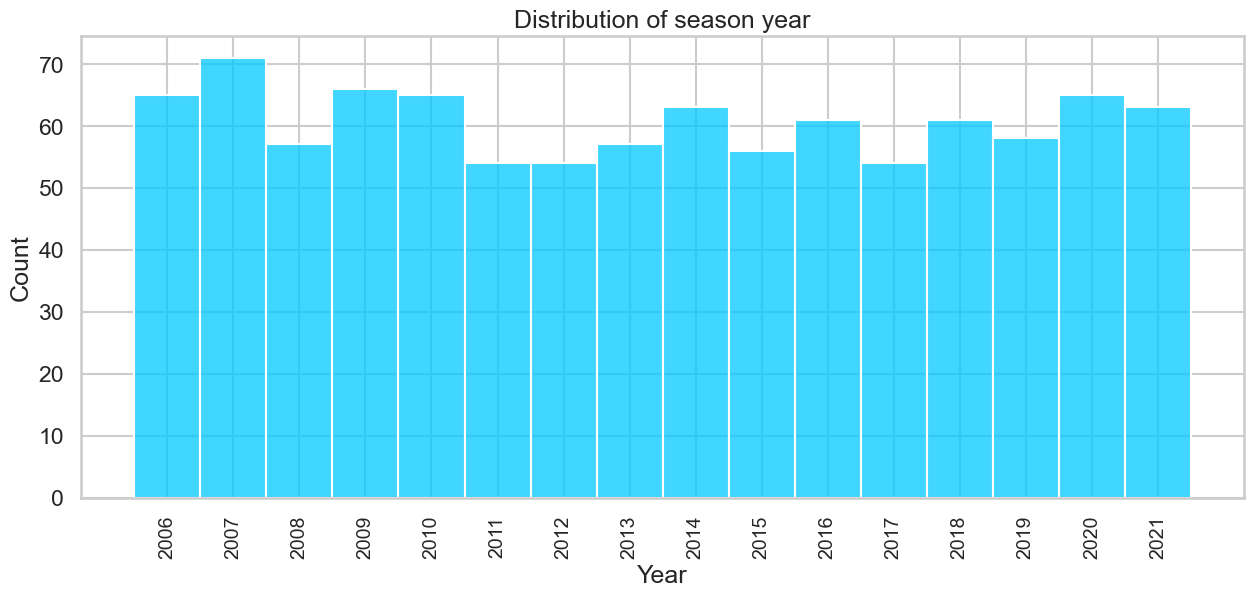

In [9]:
plt.figure(figsize=(15, 6))

# calculate bin edges
unique_values = np.unique(df['year'])
bin_edges = np.linspace(unique_values.min()-0.5, unique_values.max()+0.5, len(unique_values)+1)

# histplot with calculated bin edges
ax = sns.histplot(df, x='year', bins=bin_edges, color=chart_colors[0])

# title and labels
plt.title('Distribution of season year')
plt.xlabel('Year')

# set x-ticks at the center of each bin
ax.set_xticks((bin_edges[:-1] + bin_edges[1:]) / 2)

# x-ticks
ax.set_xticklabels(labels=unique_values, rotation=90, fontdict={'fontsize': 14});

- Input data from 2006-2021 with at least 50 observations per season.
- 2022 season with 2023 target is holdout test set.

### Range of experience

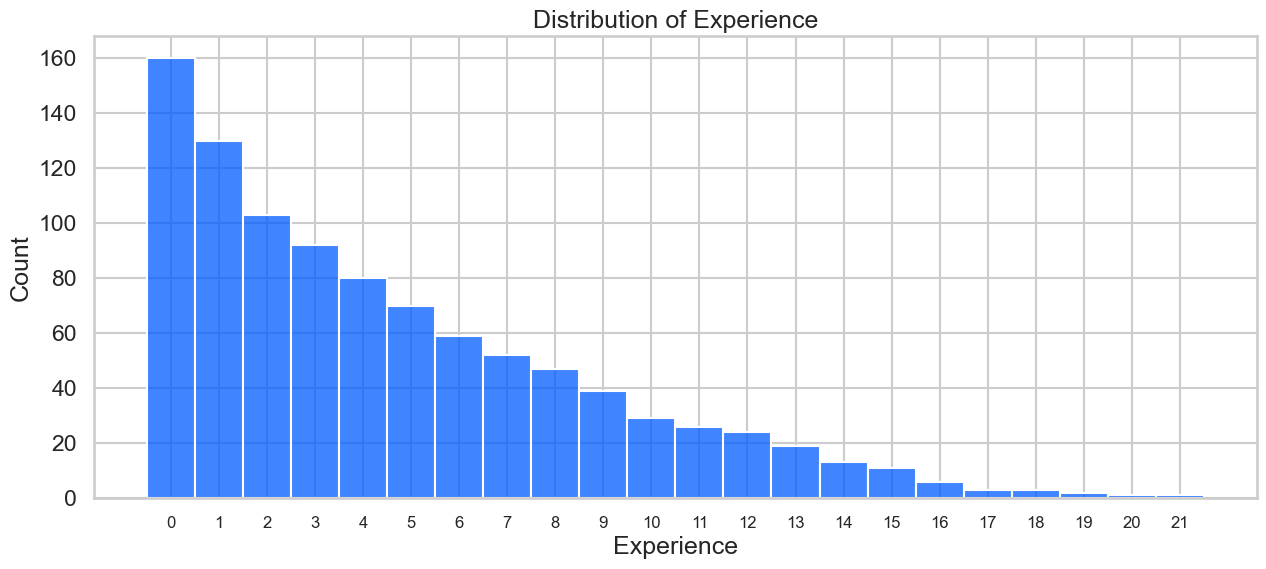

In [10]:
plt.figure(figsize=(15, 6))

# calculate bin edges
unique_values = np.unique(df['exp'])
bin_edges = np.linspace(unique_values.min()-0.5, unique_values.max()+0.5, len(unique_values)+1)

# histplot with calculated bin edges
ax = sns.histplot(df, x='exp', bins=bin_edges, color=chart_colors[1])

# title and labels
plt.title('Distribution of Experience')
plt.xlabel('Experience')

# set x-ticks at the center of each bin
ax.set_xticks((bin_edges[:-1] + bin_edges[1:]) / 2)

# x-ticks
ax.set_xticklabels(labels=unique_values, rotation=0, fontdict={'fontsize': 12});

In [65]:
df[['exp']].describe().T

,count,mean,std,min,25%,50%,75%,max
exp,970.0,4.603093,4.232679,0.0,1.0,3.5,7.0,21.0


In [66]:
# players with more than 20 years of experience
df[df['exp'] >= 20]

,player,team_name,player_game_count,pass_accuracy_percent,pass_aimed_passes,pass_attempts,pass_avg_depth_of_target,pass_avg_time_to_throw,pass_bats,pass_big_time_throws,pass_btt_rate,pass_completion_percent,pass_completions,pass_def_gen_pressures,pass_drop_rate,pass_dropbacks,pass_drops,pass_first_downs,pass_grades_hands_fumble,pass_grades_offense,pass_grades_pass,pass_hit_as_threw,pass_interceptions,pass_passing_snaps,pass_penalties,pass_pressure_to_sack_rate,pass_qb_rating,pass_sack_percent,pass_sacks,pass_scrambles,pass_spikes,pass_thrown_aways,pass_touchdowns,pass_turnover_worthy_plays,pass_twp_rate,pass_yards,pass_ypa,year,rush_attempts,rush_avoided_tackles,rush_breakaway_attempts,rush_breakaway_percent,rush_breakaway_yards,rush_designed_yards,rush_elu_recv_mtf,rush_elu_rush_mtf,rush_elu_yco,rush_elusive_rating,rush_explosive,rush_first_downs,rush_fumbles,rush_gap_attempts,rush_grades_offense_penalty,rush_grades_run,rush_longest,rush_run_plays,rush_scramble_yards,rush_total_touches,rush_touchdowns,rush_yards,rush_yards_after_contact,rush_yco_attempt,rush_ypa,rush_zone_attempts,pass_tds_gm,pass_yds_gm,exp,rolling_mean,rolling_std,target
1214,Tom Brady,TB,16,75.1,578,610,9.6,2.41,7,45,6.9,65.7,401,155,7.6,636,33,233,91.0,92.4,91.5,4,12,680,4,13.5,102.2,3.3,21,4,4,17,40,12,1.8,4633,7.6,2020,26.0,0.0,0.0,0.0,0.0,-2.0,0.0,0.0,2.0,0.0,0.0,6.0,5.0,2.0,78.6,63.1,4.0,344.0,8.0,26.0,3.0,6.0,28.0,0.93,0.2,0.0,2.500000,289.562500,20,87.866667,6.436096,92.0
1215,Tom Brady,TB,17,76.4,681,719,8.4,2.34,10,42,5.6,67.5,485,150,6.7,751,35,275,90.0,92.0,90.8,1,12,781,1,14.7,102.1,2.9,22,10,2,25,43,15,1.9,5316,7.4,2021,18.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,3.0,0.0,4.0,14.0,4.0,0.0,80.1,77.6,13.0,356.0,76.0,18.0,2.0,81.0,43.0,1.54,2.9,0.0,2.529412,312.705882,21,88.300000,6.757958,79.7


- We have rookie QBs (exp=0) all the way up to a QB with 21 years of experience.
- The average years of experience for a row in our dataset is 4.6.

### Games played per season

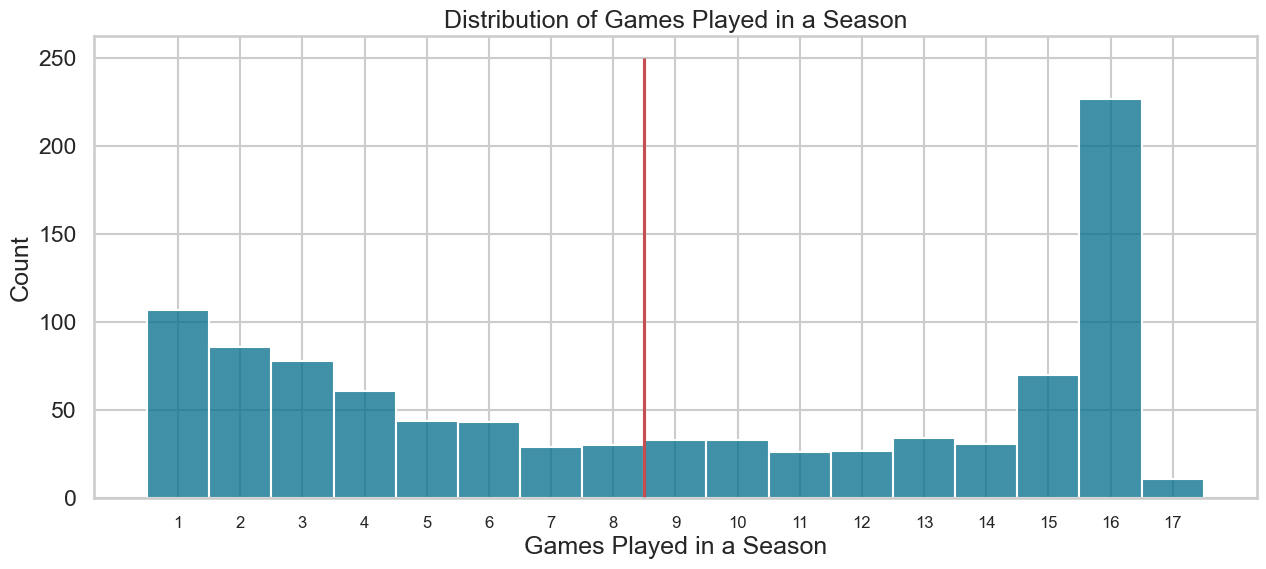

In [26]:
plt.figure(figsize=(15, 6))

# calculate bin edges
unique_values = np.unique(df['player_game_count'])
bin_edges = np.linspace(unique_values.min()-0.5, unique_values.max()+0.5, len(unique_values)+1)

# histplot with calculated bin edges
ax = sns.histplot(df, x='player_game_count', bins=bin_edges, color=chart_colors[2])

# vline to show split between 8 and 9 games (explained at the end of this notebook)
plt.vlines(x=8.5, ymin=0, ymax=250, linestyles='-', colors='r')

# title and labels
plt.title('Distribution of Games Played in a Season')
plt.xlabel('Games Played in a Season')

# set x-ticks at the center of each bin
ax.set_xticks((bin_edges[:-1] + bin_edges[1:]) / 2)

# x-ticks
ax.set_xticklabels(labels=unique_values, rotation=0, fontdict={'fontsize': 12})

# save
plt.savefig('./images/games_played');

In [68]:
df[['player_game_count']].describe().T

,count,mean,std,min,25%,50%,75%,max
player_game_count,970.0,8.927835,5.806739,1.0,3.0,9.0,15.0,17.0


- The average QB in our dataset played about 9 games per season.
- Our data includes backup QBs (who maybe only play a couple of games per season) and starters (who play close to 16 games).

### Seasons per player
- Number of seasons per unique player in the dataset 

In [17]:
# store player name: num seasons
seasons_per_player = {}

for key, val in df.groupby('player').groups.items():
    seasons_per_player[key] = len(val)
    
seasons = list(seasons_per_player.values())

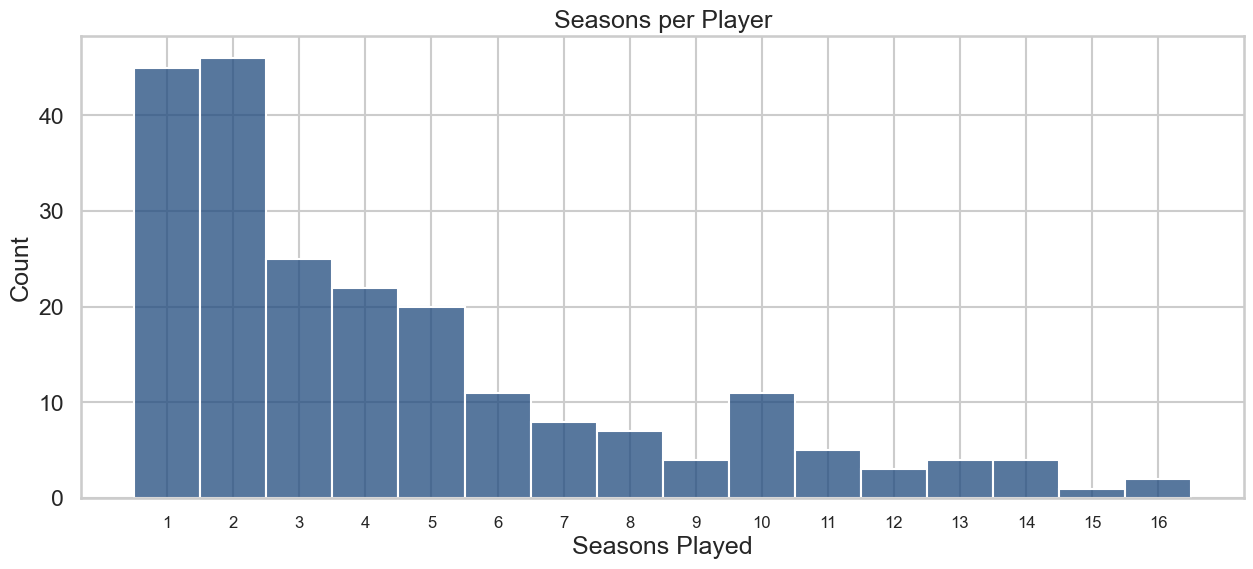

In [20]:
plt.figure(figsize=(15, 6))

# calculate bin edges
unique_values = np.unique(seasons)
bin_edges = np.linspace(unique_values.min()-0.5, unique_values.max()+0.5, len(unique_values)+1)

# plot the distribution of seasons per player
ax = sns.histplot(seasons, bins=bin_edges, color=chart_colors[3])

# title and labels
plt.title('Seasons per Player')
plt.xlabel('Seasons Played')

# set x-ticks at the center of each bin
ax.set_xticks((bin_edges[:-1] + bin_edges[1:]) / 2)

# x-ticks
ax.set_xticklabels(labels=unique_values, rotation=0, fontdict={'fontsize': 12});

In [71]:
print(f'Mean seasons per player: {np.mean(seasons)}')
print(f'Median seasons per player: {np.median(seasons)}')
print(f'Min seasons per player: {np.min(seasons)}')
print(f'Max seasons per player: {np.max(seasons)}')

Mean seasons per player: 4.4495412844036695
Median seasons per player: 3.0
Min seasons per player: 1
Max seasons per player: 16


- The average player in our dataset has 4 seasons of NFL data.
- We have players with only 1 season, all the way up to 2 players with 16 seasons in the dataset (Tom Brady and Aaron Rodgers).

### Passing attempts

In [72]:
df[['pass_attempts']].describe().T

,count,mean,std,min,25%,50%,75%,max
pass_attempts,970.0,271.554639,220.581349,1.0,44.0,244.0,485.0,727.0


In [73]:
df[df['pass_attempts'] >= 100].shape[0] / df.shape[0]

0.6515463917525773

- 65% of seasons had more than 100 passing attempts.

# Target variable
- Analyze and describe future offensive grade.

In [11]:
# get target var
y = df[['target']]
y.describe().T

,count,mean,std,min,25%,50%,75%,max
target,970.0,64.035155,14.951563,20.6,53.75,64.55,74.5,95.2


- Mean/median offensive grade target is about 64.
- Standard deviation of 15.

In [12]:
# min grade
df[df['pass_grades_offense'] == 20.6]

,player,team_name,player_game_count,pass_accuracy_percent,pass_aimed_passes,pass_attempts,pass_avg_depth_of_target,pass_avg_time_to_throw,pass_bats,pass_big_time_throws,pass_btt_rate,pass_completion_percent,pass_completions,pass_def_gen_pressures,pass_drop_rate,pass_dropbacks,pass_drops,pass_first_downs,pass_grades_hands_fumble,pass_grades_offense,pass_grades_pass,pass_hit_as_threw,pass_interceptions,pass_passing_snaps,pass_penalties,pass_pressure_to_sack_rate,pass_qb_rating,pass_sack_percent,pass_sacks,pass_scrambles,pass_spikes,pass_thrown_aways,pass_touchdowns,pass_turnover_worthy_plays,pass_twp_rate,pass_yards,pass_ypa,year,rush_attempts,rush_avoided_tackles,rush_breakaway_attempts,rush_breakaway_percent,rush_breakaway_yards,rush_designed_yards,rush_elu_recv_mtf,rush_elu_rush_mtf,rush_elu_yco,rush_elusive_rating,rush_explosive,rush_first_downs,rush_fumbles,rush_gap_attempts,rush_grades_offense_penalty,rush_grades_run,rush_longest,rush_run_plays,rush_scramble_yards,rush_total_touches,rush_touchdowns,rush_yards,rush_yards_after_contact,rush_yco_attempt,rush_ypa,rush_zone_attempts,pass_tds_gm,pass_yds_gm,exp,rolling_mean,rolling_std,target
499,Geno Smith,LAC,3,50.0,2,4,2.5,3.2,1,0,0.0,25.0,1,3,0.0,6,0,0,13.9,20.6,17.2,0,0,7,1,33.3,39.6,16.7,1,1,0,1,0,3,42.9,8,2.0,2018,7.0,0.0,0.0,0.0,0.0,-7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59.2,9.0,25.0,9.0,7.0,0.0,2.0,0.0,0.0,0.3,0.0,0.0,2.666667,5,52.166667,27.496242,62.2


- Min offensive grade of 20.6: Geno Smith's 2018 season.

In [13]:
# max grade
df[df['pass_grades_offense'] == 95.2]

,player,team_name,player_game_count,pass_accuracy_percent,pass_aimed_passes,pass_attempts,pass_avg_depth_of_target,pass_avg_time_to_throw,pass_bats,pass_big_time_throws,pass_btt_rate,pass_completion_percent,pass_completions,pass_def_gen_pressures,pass_drop_rate,pass_dropbacks,pass_drops,pass_first_downs,pass_grades_hands_fumble,pass_grades_offense,pass_grades_pass,pass_hit_as_threw,pass_interceptions,pass_passing_snaps,pass_penalties,pass_pressure_to_sack_rate,pass_qb_rating,pass_sack_percent,pass_sacks,pass_scrambles,pass_spikes,pass_thrown_aways,pass_touchdowns,pass_turnover_worthy_plays,pass_twp_rate,pass_yards,pass_ypa,year,rush_attempts,rush_avoided_tackles,rush_breakaway_attempts,rush_breakaway_percent,rush_breakaway_yards,rush_designed_yards,rush_elu_recv_mtf,rush_elu_rush_mtf,rush_elu_yco,rush_elusive_rating,rush_explosive,rush_first_downs,rush_fumbles,rush_gap_attempts,rush_grades_offense_penalty,rush_grades_run,rush_longest,rush_run_plays,rush_scramble_yards,rush_total_touches,rush_touchdowns,rush_yards,rush_yards_after_contact,rush_yco_attempt,rush_ypa,rush_zone_attempts,pass_tds_gm,pass_yds_gm,exp,rolling_mean,rolling_std,target
1210,Tom Brady,NE,12,79.3,392,432,8.4,2.49,7,33,7.2,67.4,291,142,6.4,459,20,170,89.2,95.2,94.5,2,2,490,2,10.6,112.2,3.3,15,12,1,30,28,4,0.8,3554,8.2,2016,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,10.0,5.0,0.0,88.9,59.2,15.0,327.0,64.0,16.0,0.0,64.0,25.0,0.89,2.3,0.0,2.333333,296.166667,16,90.633333,5.51936,92.9


- Max offensive grade of 95.2: Tom Brady's 2016 season.

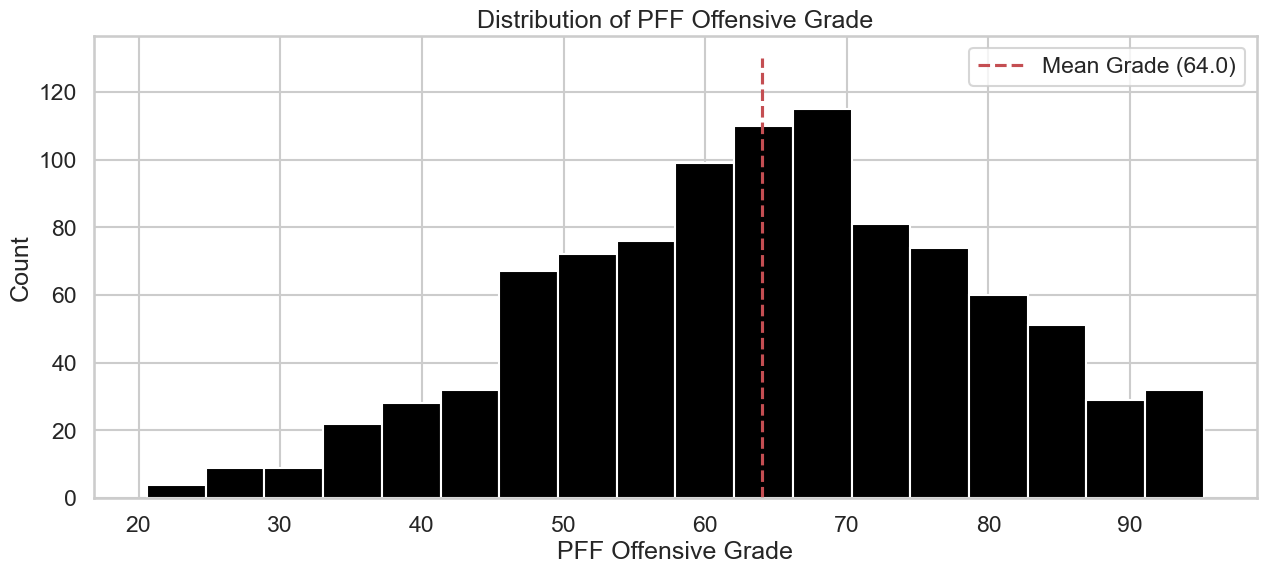

In [15]:
plt.figure(figsize=(15, 6))

# look at distribution of target
sns.histplot(y, facecolor=chart_colors[4])

# vline to show mean
plt.vlines(x=y.mean(), ymin=0, ymax=130, linestyles='dashed', colors='r', label=f'Mean Grade ({round(y.mean().values[0], 0)})')

# title, labels
plt.title('Distribution of PFF Offensive Grade')
plt.ylabel('Count')
plt.xlabel('PFF Offensive Grade')
plt.legend()

# save
plt.savefig('./images/target_dist');

- Pretty normal distribution of the target var.
- 2007-2022 seasons.

# Grade columns
- Player "grade" is what PFF is known for. In our dataset, each QB has 3 specific grades for each season: overall offensive grade, passing grade, and rushing grade.

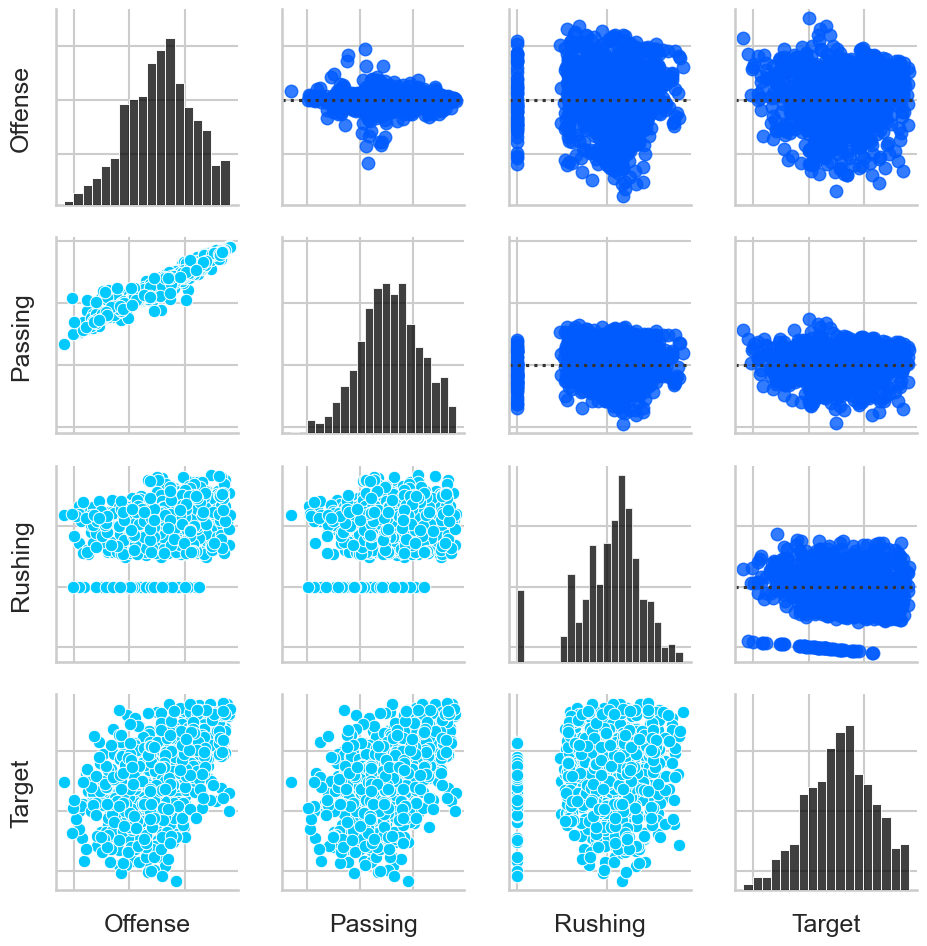

In [78]:
# rename columns for the plot
df_rename = df.rename(columns={
    'pass_grades_offense': 'Offense',
    'pass_grades_pass': 'Passing',
    'rush_grades_run': 'Rushing',
    'target': 'Target'
})

# create pairplot
g = sns.PairGrid(df_rename[['Offense', 'Passing', 'Rushing', 'Target']])

# map residual plot to upper triangle
g.map_upper(sns.residplot, color=chart_colors[1]) 

# map regression plot to the lower triangle
g.map_lower(sns.scatterplot, color=chart_colors[0])

# map histogram to the diagonal
g.map_diag(sns.histplot, color=chart_colors[4])

# remove tick labels
for ax in g.axes.flat: 
    ax.set_xticklabels([])
    ax.set_yticklabels([]);

In [79]:
df[['pass_grades_offense', 'pass_grades_pass', 'rush_grades_run', 'target']].corr()

,pass_grades_offense,pass_grades_pass,rush_grades_run,target
pass_grades_offense,1.000000,0.968256,0.225109,0.502098
pass_grades_pass,0.968256,1.000000,0.108751,0.487626
rush_grades_run,0.225109,0.108751,1.000000,0.138310
target,0.502098,0.487626,0.138310,1.000000


__Grade correlations within a season:__
- Passing grade correlates very strongly with a QB's overall offensive grade (0.97 correlation).
- Rush grade has a much smaller correlation with offensive grade at 0.23. Rush grade correlates even less with passing grade at an anemic 0.11 correlation.
- This makes sense, as the quarterback position is primarily responsible for passing the football. Although rushing QBs have become more standard in today's league, a QB's ability to pass the football effictively and consistently has a much greater impact on their offensive performance than their rushing capabilities.

__Grade correlations with target var:__
- Both offensive and passing grades of the previous season correlate moderately with the following season's offensive grade, both around a 0.5 correlation.
- Once again, rush grade seems to be a much worse predictor of overall offensive performance, only correlating with the target var at 0.14.

# Feature correlation
- Find strongest corrs to target variable to produce feature subsets to train models on.

In [80]:
# drop player name
no_player = df.drop(['player', 'team_name'], axis=1)

In [81]:
# corr matrix of target column, drop target row
corr = no_player.corr()[['target']].drop('target', axis=0)

# sort vals, lowest corrs on left, largest on right
corr.sort_values('target').T

,pass_pressure_to_sack_rate,pass_sack_percent,pass_twp_rate,rush_elusive_rating,pass_drop_rate,rolling_std,rush_elu_recv_mtf,pass_avg_depth_of_target,rush_yco_attempt,rush_ypa,pass_avg_time_to_throw,pass_grades_hands_fumble,rush_breakaway_percent,rush_grades_offense_penalty,year,rush_gap_attempts,rush_designed_yards,rush_elu_rush_mtf,rush_breakaway_yards,rush_grades_run,rush_elu_yco,rush_breakaway_attempts,rush_avoided_tackles,pass_btt_rate,rush_zone_attempts,rush_yards_after_contact,pass_completion_percent,pass_ypa,pass_accuracy_percent,exp,rush_longest,rush_explosive,rush_yards,rush_touchdowns,rush_scramble_yards,pass_scrambles,pass_spikes,rush_first_downs,pass_bats,pass_turnover_worthy_plays,pass_interceptions,pass_hit_as_threw,pass_qb_rating,rush_fumbles,rush_attempts,rush_total_touches,pass_penalties,pass_sacks,pass_thrown_aways,pass_yds_gm,pass_drops,pass_def_gen_pressures,pass_tds_gm,rush_run_plays,player_game_count,pass_dropbacks,pass_passing_snaps,pass_grades_pass,pass_attempts,pass_aimed_passes,pass_big_time_throws,pass_grades_offense,pass_completions,pass_first_downs,pass_yards,rolling_mean,pass_touchdowns
target,-0.148795,-0.137868,-0.121418,-0.040798,-0.010355,-0.003936,0.009335,0.010766,0.018314,0.034515,0.047513,0.0814,0.08738,0.088902,0.100315,0.103268,0.127706,0.131145,0.137395,0.13831,0.140969,0.146513,0.173166,0.173596,0.186905,0.190662,0.195441,0.206052,0.208437,0.220786,0.222908,0.226555,0.227597,0.246517,0.24658,0.269002,0.270201,0.287474,0.314875,0.31656,0.317987,0.318205,0.3201,0.324389,0.334201,0.334842,0.343141,0.376471,0.423298,0.434114,0.436208,0.457194,0.4654,0.471925,0.474023,0.484991,0.486666,0.487626,0.489447,0.49016,0.494656,0.502098,0.508426,0.517432,0.518093,0.523356,0.535807


- Overall, no correlations were extremely negative. The most negative corr was pressure_to_sack_rate at -0.15. This describes QBs who have a poor time avoiding sacks when pressured, thus resulting in a lower offensive grade.
- Surprised that rolling_std has a correlation so close to 0. I thought that this engineered feature would have a very negative correlation, identifying QB inconsistency.
- Player experience has a surprising low corr at 0.22.
- Stats like thrown_aways, pass_drops, and def_gen_pressures have correlations above 0.4. Although these statistics are negative (QBs would prefer for these values to be low), higher values in these columns seem to correlate with a higher offensive grade. This is very likely a product of volume. Starting QBs in our dataset will have higher values for these columns, as they play more games. It's hard to tell if these columns will provide any actual insight in the modeling process.
- Not surprising that grades_pass, big_time_throws, grades_offense, yards, and touchdowns have high correlations (all around 0.5).
- Other than TDs, our engineered feature "rolling_mean" has the highest correlation to the target variable (at 0.52).
- pass_tds_gm and pass_yds_gm also has very high correlations, but still lower than the totals for tds and yards.

In [82]:
# only look at corrs with abs value greater than 0.3, fill rest of cells with NaN
filtered_corr = corr.where(corr.abs() > 0.3, np.nan)

# drop rows with null values
filtered_corr = filtered_corr.dropna(axis=0, how='all')

filtered_corr.shape

(29, 1)

In [83]:
filtered_corr.index

Index(['player_game_count', 'pass_aimed_passes', 'pass_attempts', 'pass_bats',
       'pass_big_time_throws', 'pass_completions', 'pass_def_gen_pressures',
       'pass_dropbacks', 'pass_drops', 'pass_first_downs',
       'pass_grades_offense', 'pass_grades_pass', 'pass_hit_as_threw',
       'pass_interceptions', 'pass_passing_snaps', 'pass_penalties',
       'pass_qb_rating', 'pass_sacks', 'pass_thrown_aways', 'pass_touchdowns',
       'pass_turnover_worthy_plays', 'pass_yards', 'rush_attempts',
       'rush_fumbles', 'rush_run_plays', 'rush_total_touches', 'pass_tds_gm',
       'pass_yds_gm', 'rolling_mean'],
      dtype='object')

- The 29 cols above all have correlations above 0.3 with the target variable. This subset will be one of the feature subsets that the model is trained on.